In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\Dataset\Timeseries\USD to INR.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01-01-2024,83.238,83.240,83.243,83.150,NaN,0.06%
1,02-01-2024,83.270,83.179,83.359,83.179,NaN,0.04%
2,03-01-2024,83.282,83.279,83.348,83.244,NaN,0.01%
3,04-01-2024,83.243,83.294,83.335,83.195,NaN,-0.05%
4,05-01-2024,83.103,83.235,83.286,83.067,NaN,-0.17%


In [3]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [4]:
data.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'],inplace = True)

In [5]:
data.rename(columns = {'Date':'ds','Price':'y'},inplace = True)

In [6]:
data.head()

,ds,y
0,01-01-2024,83.238
1,02-01-2024,83.270
2,03-01-2024,83.282
3,04-01-2024,83.243
4,05-01-2024,83.103


In [7]:
data.describe()

,y
count,320.000000
mean,84.206884
std,1.292555
min,82.708000
25%,83.337500
50%,83.722000
75%,84.586250
max,87.627000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      320 non-null    object 
 1   y       320 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB


In [9]:
data.isnull().sum()

ds    0
y     0
dtype: int64

In [10]:
data['ds'] = pd.to_datetime(data['ds'],format = '%d-%m-%Y')

In [11]:
data.head()

,ds,y
0,2024-01-01,83.238
1,2024-01-02,83.270
2,2024-01-03,83.282
3,2024-01-04,83.243
4,2024-01-05,83.103


<Axes: >

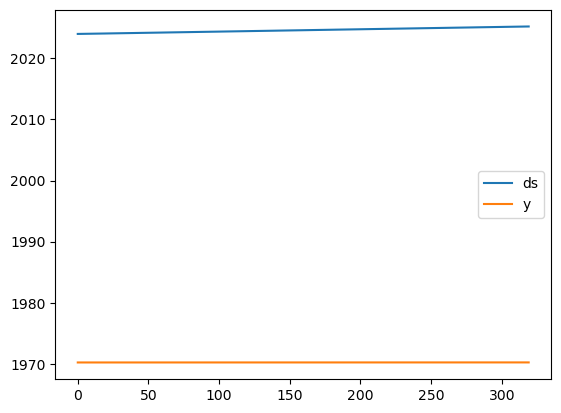

In [19]:
data.plot()

In [13]:
#Durbin_watson test to check autocorrelation
import statsmodels.api as sm

In [16]:
dt = sm.stats.durbin_watson(data['y'])

In [17]:
dt

2.1344523286684114e-06

### Positive Autocorrelation 

In [18]:
from prophet import Prophet

In [20]:
m = Prophet()
model = m.fit(data)

14:47:04 - cmdstanpy - INFO - Chain [1] start processing
14:47:05 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [22]:
future_df = model.make_future_dataframe(periods = 365,freq = 'D')

In [24]:
pred = model.predict(future_df)

In [25]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-01,83.169327,82.862880,83.460178,83.169327,83.169327,0.001497,0.001497,0.001497,0.001497,0.001497,0.001497,0.0,0.0,0.0,83.170824
1,2024-01-02,83.164418,82.868306,83.468997,83.164418,83.164418,0.010221,0.010221,0.010221,0.010221,0.010221,0.010221,0.0,0.0,0.0,83.174638
2,2024-01-03,83.159508,82.879013,83.481295,83.159508,83.159508,0.012984,0.012984,0.012984,0.012984,0.012984,0.012984,0.0,0.0,0.0,83.172492
3,2024-01-04,83.154599,82.877786,83.443291,83.154599,83.154599,0.006707,0.006707,0.006707,0.006707,0.006707,0.006707,0.0,0.0,0.0,83.161306
4,2024-01-05,83.149690,82.849689,83.436236,83.149690,83.149690,-0.000998,-0.000998,-0.000998,-0.000998,-0.000998,-0.000998,0.0,0.0,0.0,83.148692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2026-03-17,94.426782,83.222923,106.241229,83.279140,106.199620,0.010221,0.010221,0.010221,0.010221,0.010221,0.010221,0.0,0.0,0.0,94.437002
681,2026-03-18,94.446397,83.451016,106.178298,83.266384,106.248267,0.012984,0.012984,0.012984,0.012984,0.012984,0.012984,0.0,0.0,0.0,94.459380
682,2026-03-19,94.466012,83.253739,106.184500,83.235710,106.292036,0.006707,0.006707,0.006707,0.006707,0.006707,0.006707,0.0,0.0,0.0,94.472719
683,2026-03-20,94.485627,83.144505,106.193926,83.206338,106.363325,-0.000998,-0.000998,-0.000998,-0.000998,-0.000998,-0.000998,0.0,0.0,0.0,94.484629


In [26]:
pred[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2024-01-01,82.862880,83.460178,83.170824
1,2024-01-02,82.868306,83.468997,83.174638
2,2024-01-03,82.879013,83.481295,83.172492
3,2024-01-04,82.877786,83.443291,83.161306
4,2024-01-05,82.849689,83.436236,83.148692
...,...,...,...,...
680,2026-03-17,83.222923,106.241229,94.437002
681,2026-03-18,83.451016,106.178298,94.459380
682,2026-03-19,83.253739,106.184500,94.472719
683,2026-03-20,83.144505,106.193926,94.484629


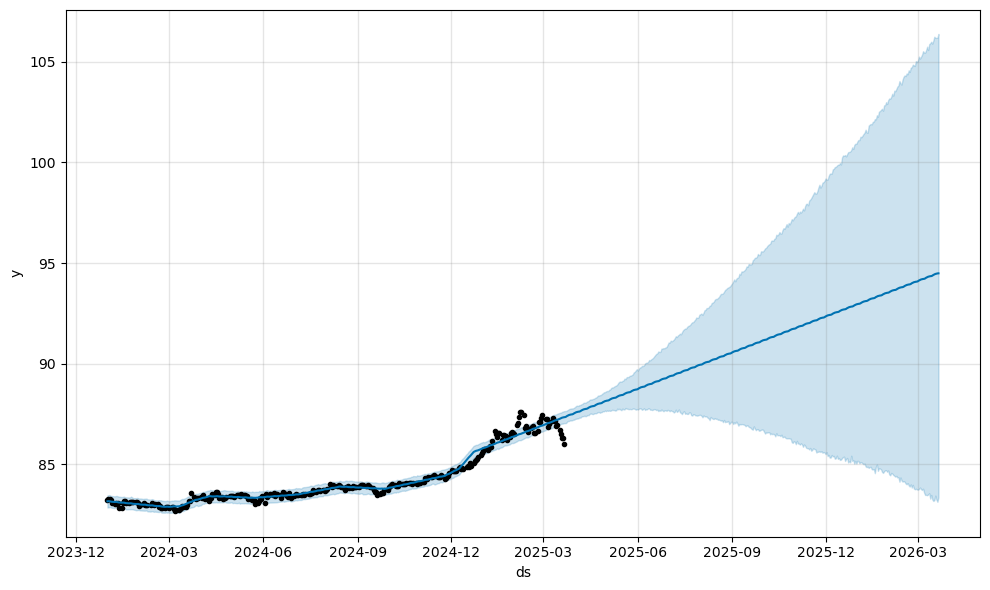

In [27]:
model.plot(pred)
plt.show()

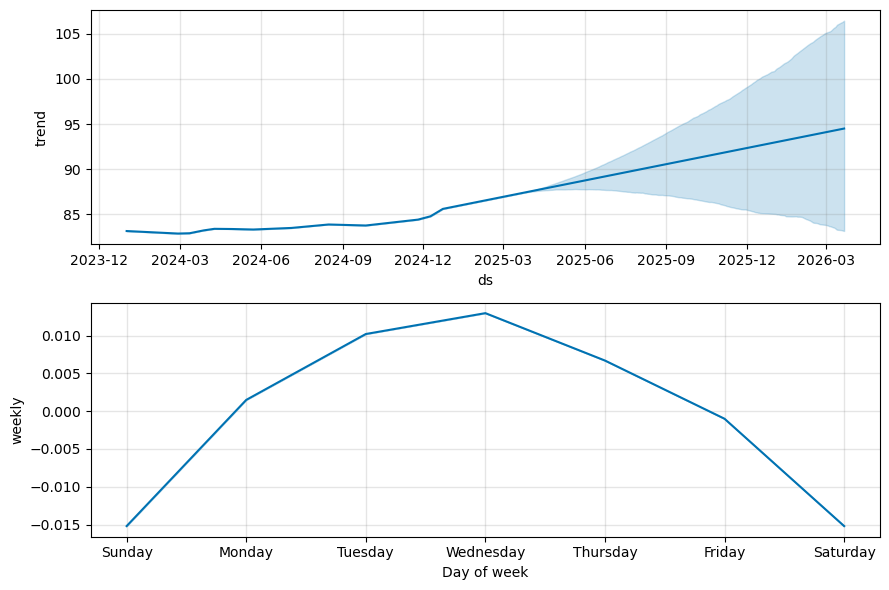

In [28]:
model.plot_components(pred)
plt.show()

In [30]:
from prophet.diagnostics import cross_validation

In [31]:
cv = cross_validation(model,horizon = '50 days',period='1 day',initial = 200)
cv

Seasonality has period of 7 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/395 [00:00<?, ?it/s]

14:56:17 - cmdstanpy - INFO - Chain [1] start processing
14:56:17 - cmdstanpy - INFO - Chain [1] done processing
14:56:18 - cmdstanpy - INFO - Chain [1] start processing
14:56:18 - cmdstanpy - INFO - Chain [1] done processing
14:56:18 - cmdstanpy - INFO - Chain [1] start processing
14:56:18 - cmdstanpy - INFO - Chain [1] done processing
14:56:18 - cmdstanpy - INFO - Chain [1] start processing
14:56:19 - cmdstanpy - INFO - Chain [1] done processing
14:56:19 - cmdstanpy - INFO - Chain [1] start processing
14:56:20 - cmdstanpy - INFO - Chain [1] done processing
14:56:20 - cmdstanpy - INFO - Chain [1] start processing
14:56:21 - cmdstanpy - INFO - Chain [1] done processing
14:56:21 - cmdstanpy - INFO - Chain [1] start processing
14:56:22 - cmdstanpy - INFO - Chain [1] done processing
14:56:22 - cmdstanpy - INFO - Chain [1] start processing
14:56:25 - cmdstanpy - INFO - Chain [1] done processing
14:56:25 - cmdstanpy - INFO - Chain [1] start processing
14:56:29 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-03,-1297.163875,-1297.163876,-1297.163875,83.282,2024-01-02
1,2024-01-04,607.429003,607.429000,607.429006,83.243,2024-01-02
2,2024-01-05,-851.746315,-851.746320,-851.746309,83.103,2024-01-02
3,2024-01-08,-383.281820,-383.281829,-383.281811,83.045,2024-01-02
4,2024-01-09,-383.249869,-383.249882,-383.249857,83.109,2024-01-02
...,...,...,...,...,...,...
14103,2025-03-17,88.007275,87.299981,88.709325,86.690,2025-01-30
14104,2025-03-18,88.056186,87.269362,88.832656,86.510,2025-01-30
14105,2025-03-19,88.095861,87.335391,88.870744,86.310,2025-01-30
14106,2025-03-20,88.124840,87.291013,88.949018,86.336,2025-01-30


In [32]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-03,-1297.163875,-1297.163876,-1297.163875,83.282,2024-01-02
1,2024-01-04,607.429003,607.429000,607.429006,83.243,2024-01-02
2,2024-01-05,-851.746315,-851.746320,-851.746309,83.103,2024-01-02
3,2024-01-08,-383.281820,-383.281829,-383.281811,83.045,2024-01-02
4,2024-01-09,-383.249869,-383.249882,-383.249857,83.109,2024-01-02


In [34]:
from prophet.diagnostics import performance_metrics
df_perf = performance_metrics(cv)
df_perf

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,7064.992149,84.053508,6.019002,0.072414,0.001720,0.027931,0.455635
1,7 days,6489.022679,80.554470,5.860906,0.070532,0.001792,0.028764,0.459574
2,8 days,14161.866714,119.003642,8.511537,0.102455,0.001908,0.028655,0.473822
3,9 days,22487.836838,149.959451,10.949135,0.131875,0.002005,0.028902,0.489098
4,10 days,22080.629747,148.595524,10.885740,0.131136,0.002099,0.028836,0.502170
5,11 days,20180.085415,142.056627,9.727244,0.117193,0.002199,0.028406,0.517730
6,12 days,25580.220260,159.938176,10.887648,0.131229,0.002251,0.030388,0.532960
7,13 days,25290.305156,159.029259,10.759571,0.129685,0.002298,0.033308,0.545753
8,14 days,24872.590736,157.710465,11.292891,0.135984,0.002456,0.034442,0.555319
9,15 days,41522.621371,203.771002,15.064949,0.181287,0.002621,0.034528,0.571563


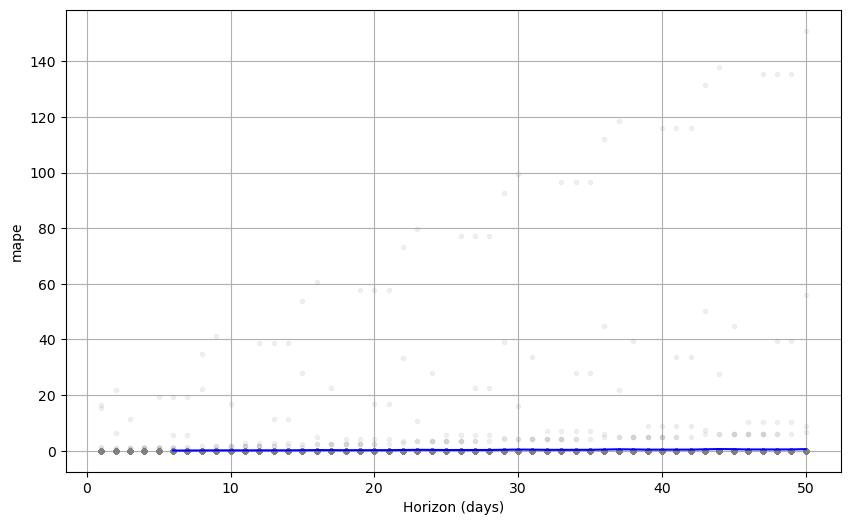

In [37]:
from prophet.plot import plot_cross_validation_metric
df = plot_cross_validation_metric(cv,metric = 'mape')
plt.show()

In [38]:
df_perf.to_csv('Model Performance CV.csv')

In [39]:
pred.to_csv('Prediction.csv')